In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import math

#### Read data

In [179]:
def read_data(data_name, label_col):
    path = 'data/3/' + data_name
    data = pd.read_csv(path, sep="\s", header=None)
    labels = data[label_col]
    data = data.drop(label_col, axis=1)
    return data, labels

data, labels = read_data('Compound.txt', 2) 
data.head()

,0,1
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95


#### DBSCAN algorithm

In [171]:
def data_neighbors(data, eps):
    """ This function gets neighbots of any data """
    neighbors = {i:[] for i in range(data.shape[0])}
    for i in range(data.shape[0]):
        dist = np.linalg.norm(data - data.iloc[i], axis=1)
        for j in range(data.shape[0]):
            if dist[j] < eps:
                neighbors[i].append(j)
    return neighbors

def DBSCAN(data, min_points, eps):
    """ This function run DBSCAN algorithm """
    neighbors = data_neighbors(data, eps)
    data_labels = {i: None for i in range(data.shape[0])}
    cluster_number = 0
    for i in range(data.shape[0]):
        if data_labels[i]:
            continue
        if len(neighbors[i]) < min_points:
            data_labels[i] = 'Noise'
            continue
        cluster_number += 1
        data_labels[i] = cluster_number
        neighbor_here = neighbors[i]
        for neighbor in neighbor_here:
            if neighbor == i:
                continue
            if data_labels[neighbor] == 'Noise':
                data_labels[neighbor] = cluster_number
            if data_labels[neighbor]:
                continue
            data_labels[neighbor] = cluster_number
            if len(neighbors[neighbor]) >= min_points:
                neighbor_here.extend(neighbors[neighbor])
    data_labels = [data_labels[k] for k in range(data.shape[0])]
    return pd.DataFrame(data_labels)

#### Plot clustering result and calculate purity

In [184]:
def plot_clustering(data, clusters, title, tow_D):
    """ This function plots clustered data """
    cluster_names = set(clusters[0])
    if tow_D:
        for cluster in cluster_names:
            one_cluster = data.loc[(clusters==cluster)[0]]
            if cluster == 'Noise':
                plt.scatter(x=one_cluster[0], y=one_cluster[1], color='black', label='Noise')
            else:
                plt.scatter(x=one_cluster[0], y=one_cluster[1])
    else:
        fig = plt.figure(figsize = (10, 7))
        ax = plt.axes(projection ="3d")
        for cluster in cluster_names:
            one_cluster = data.loc[(clusters==cluster)[0]]
            ax.scatter3D(one_cluster.T.iloc[0], one_cluster.T.iloc[1], one_cluster.T.iloc[2])
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def get_purity(data, labels, clusters):
    """ This function gets data and clustering and labels then calculates purity """
    cluster_names = set(clusters[0])
    max_values = 0
    for cluster in cluster_names:
        one_cluster = data.loc[(clusters==cluster)[0]]
        one_cluster_label = labels.loc[(clusters==cluster)[0]]
        value_count = one_cluster_label.value_counts()
        max_values += value_count.max()
    purity = max_values/data.shape[0]
    return purity

#### Compound.txt data

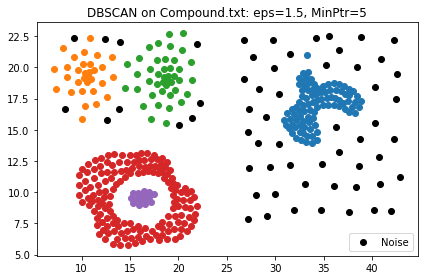

Purity of clustered data of Compound.txt: 0.9699248120300752


In [185]:
data, labels = read_data('Compound.txt', 2) 
eps=1.5
MinPtr=5
clusters = DBSCAN(data, MinPtr, eps)
plot_clustering(data, clusters, 'DBSCAN on Compound.txt: eps={0}, MinPtr={1}'.format(eps, MinPtr), True)
purity = get_purity(data, labels, clusters)
print('Purity of clustered data of Compound.txt: ' + str(purity))

#### D31.txt data

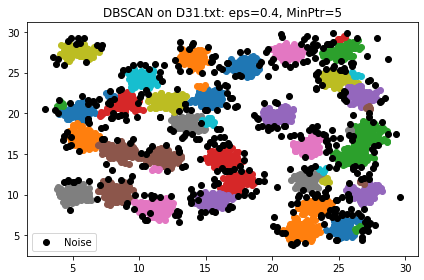

Purity of clustered data of D31.txt: 0.7938709677419354


In [186]:
data, labels = read_data('D31.txt', 2) 
eps=0.4
MinPtr=5
clusters = DBSCAN(data, MinPtr, eps)
plot_clustering(data, clusters, 'DBSCAN on D31.txt: eps={0}, MinPtr={1}'.format(eps, MinPtr), True)
purity = get_purity(data, labels, clusters)
print('Purity of clustered data of D31.txt: ' + str(purity))

#### pathbased.txt data

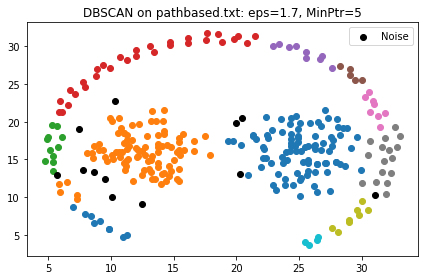

Purity of clustered data of pathbased.txt: 0.9733333333333334


In [187]:
data, labels = read_data('pathbased.txt', 2) 
eps=1.7
MinPtr=5
clusters = DBSCAN(data, MinPtr, eps)
plot_clustering(data, clusters, 'DBSCAN on pathbased.txt: eps={0}, MinPtr={1}'.format(eps, MinPtr), True)
purity = get_purity(data, labels, clusters)
print('Purity of clustered data of pathbased.txt: ' + str(purity))

#### rings.txt data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


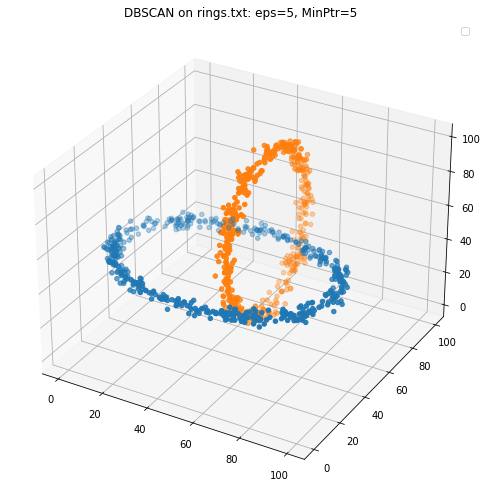

Purity of clustered data of rings.txt: 1.0


In [192]:
data, labels = read_data('rings.txt', 0) 
eps=5
MinPtr=5
clusters = DBSCAN(data, MinPtr, eps)
plot_clustering(data, clusters, 'DBSCAN on rings.txt: eps={0}, MinPtr={1}'.format(eps, MinPtr), False)
purity = get_purity(data, labels, clusters)
print('Purity of clustered data of rings.txt: ' + str(purity))

#### spiral.txt data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


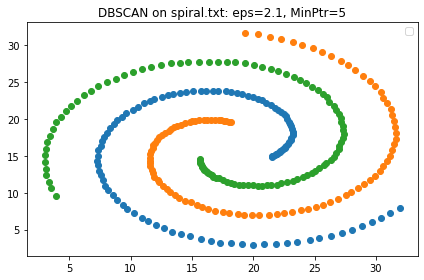

Purity of clustered data of spiral.txt: 1.0


In [198]:
data, labels = read_data('spiral.txt', 2) 
eps=2.1
MinPtr=5
clusters = DBSCAN(data, MinPtr, eps)
plot_clustering(data, clusters, 'DBSCAN on spiral.txt: eps={0}, MinPtr={1}'.format(eps, MinPtr), True)
purity = get_purity(data, labels, clusters)
print('Purity of clustered data of spiral.txt: ' + str(purity))